## What will be covered

0. End to end scikit-learn workflow
1. Getting data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm to training data and use it to make predictions on our data
4. Evaluate a model on training data and test data
5. Improve a model
6. Save and load a trained model
7. Putting these all together

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0. End to end scikit-learn Workflow



#### 0.1 Getting data ready

In [2]:
# Getting data ready
import pandas as pd
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create x (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

#### 0.2 Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 0.3 Fit the model to training data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% data will be used for training

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Make prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

#### 0.4 Evaluate the model

In [8]:
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.819672131147541

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.79      0.81      0.80        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[28,  6],
       [ 5, 22]])

In [13]:
accuracy_score(y_test, y_preds)

0.819672131147541

#### 0.5 Improve the model

In [14]:
# Try different amount of n_estimators

# setup random seed
np.random.seed(42)

for i in range(10, 100, 10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
  print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 20 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 30 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 40 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 60 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 70 estimators...
Model accuracy on test set: 75.41%
 
Trying model with 80 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 90 estimators...
Model accuracy on test set: 78.69%
 


#### 0.6 Save a model and load

In [15]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

---

## 1. Getting data ready to be used with machine learning

Three main things to do:

1. Split data into features and labels (usually 'X' and 'y')
2. Converting non-numerical values to numerical values (feature encoding / feature encoding)
3. Filling (imputing) or disregarding missing values

#### 1.1.1 Split data into features and labels

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#### 1.1.2 Split data into training and test dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### 1.2 Make sure everything is numerical (Feature Encoding)

In [21]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
# Split into labels (car_sales data)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#### 1.2.1 Convert to Numerical Value

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # these should be converted to numerical value from non-numerical
# Doors is used despite its an integer because, 4: 865, 3: 65, 5: 300 etc. [number of doors: number of instances of that number of door]

one_hot = OneHotEncoder() # One Hot Encoding

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [25]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


#### Optional
#### Basically One Hot Encoded dataset will look like this:

In [26]:
dummies = pd.get_dummies(car_sales[categorical_features])

dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [27]:
# Fit Model

# setup random seed
np.random.seed(42)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Build machine learning model
from sklearn.ensemble import RandomForestRegressor # Regression, as it will predict price (numeric value)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3235867221569877

#### 1.3 Handle Missing Values

1. Fill with some values (imputation)
2. Remove the samples with missing values

In [28]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

In [29]:
# How many missing data are there
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Handle missing data with pandas

In [30]:
# fill missing data of "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill missing data of "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# fill missing data of "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill missing data of "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [31]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
# As Price is the thing that we will predict, we didn't fill it up

# So, lets Remove rows with missing Price Value
car_sales_missing.dropna(inplace=True)

In [33]:
len(car_sales_missing) # 50 rows that were missing Price value are dropped

950

In [34]:
# Create X/y labels
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [35]:
# Convert non-numerical values to numerical values 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # these should be converted to numerical value from non-numerical
# Doors is used despite its an integer because, 4: 865, 3: 65, 5: 300 etc. [number of doors: number of instances of that number of door]

one_hot = OneHotEncoder() # One Hot Encoding

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

#### Option 2: Handle missing data with scikit-learn

In [36]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Drop rows that don't have Price values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [38]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill categorical values with "missing", door values with 4 and numerical values with mean
category_imputer = SimpleImputer(strategy="constant", fill_value="missing") # strategy=constant means do the same thing for every missing cell
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
category_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create Imputer
imputer = ColumnTransformer([
                             ("category_imputer", category_imputer, category_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [39]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [40]:
# Convert non-numerical values to numerical values 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # these should be converted to numerical value from non-numerical
# Doors is used despite its an integer because, 4: 865, 3: 65, 5: 300 etc. [number of doors: number of instances of that number of door]

one_hot = OneHotEncoder() # One Hot Encoding

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)

In [41]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#### Fit model

For both options (Option-1 & Option-2) Model will perform the same,
that's why we didn't fit a model for Option-1

In [42]:
# Fit model

# setup random seed
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.22011714008302485

In this case, model performs better when we keep missing values as it is, instead of filling up or dropping the missing values

That's because the first one had 1000 samples and the second one had 950 samples

But the take away is that, most of time a dataset won't be in a form ready to immediately start using in a ML model and most of the time the data have to be in numerical form and they can't have missing values.

---

## 2. Choose The Right Estimator/Model

In Scikit-learn the term estimator is used as another way of saying Machine learning Model/Algorithm

- Classification: Predicting whether a sample is one thing or another
- Regression: Predicting a numerical value (number)

Always Check,

Sklearn Machine Learning Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### 2.1 Picking a machine learning model for a regression problem

In [43]:
# import Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

boston_df["target"] = pd.Series(boston["target"])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Attribute Information:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

In [44]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# Setup a random seed
np.random.seed(42)

# Split X/y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.6662221670168522

- What if Ridge is not working?
- How to improve the score?

In [45]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split into X/y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestRegressor Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Check the score of the model
rf.score(X_test, y_test)

0.873969014117403

So, just by changing the model (following https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) the score was improved to 0.874 from 0.666

#### 2.2 Picking a machine learning model for a classification problem

In [46]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Let's try Linear SVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC model
clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)

# Evaluate Score
clf.score(X_test, y_test)

0.8688524590163934

In [48]:
# Let's try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate Score
clf.score(X_test, y_test)

0.8524590163934426

---

## 3. Fit a model to make predictions

#### 3.1 Fitting the model to data


Different names for:

`X` = features, feature variables, data

`y` = labels, targets, target variables

`fit` function is used for this purpose.

We generally use training dataset as the arguments for this function.

What this function does is, it goes to training dataset of `X` and goes through every row and checks the corresponding `y` value so that it can figure out a pattern created by combination of different columnuar values which led to that result. It does so to later predict the `y` value of a new sample.

#### 3.2 Make predictions using a model

Two different ways of making predictions:

1. `predict()`
2. `predict_proba()`

Make Predictions using `predict()`

In [49]:
# predict()
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [52]:
# above cell is same as,
clf.score(X_test, y_test)

0.8524590163934426

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions using `predict_proba()`

In [54]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [55]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

The difference between `predict()` and `predict_proba()` is that, `predict()` provides only a single label (either yes or no) but `predict_proba()` provides probabilities of different classification label.

We force `predict()` to give just one label (yes/no) but `predict_proba()` gives both probability of something being yes and probability of something being no.

In above example, the first array in `predict_proba()` says probability of no is 89% and probability of being yes is 11%. Similarly, the second arrays says probability of being no is 49% and probability of being yes is 51%.

Here in second array, the difference between yes and no is just 2%. But `predict()` is forced to confidently term this as yes (as the threshold is above 50%).

Making predictions with `predict()` for Regression model

In [56]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [57]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [58]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [59]:
# Compare prediction with actual truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

---

## 4. Evaluating a Machine Learning Model

Three different ways of evaluating a sklearn model:

1. Using `score` method
2. Using `scoring` parameter
3. Problem specific metric functions

#### 4.1 Evaluating using `score` method

In [60]:
# Let's try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

As this is a classification model, by default the `score` method will return the mean accuracy on the given test data and labels.

In [61]:
clf.score(X_train, y_train)

1.0

In [62]:
# Evaluate Score
clf.score(X_test, y_test)

0.8524590163934426

But for regression models the `score` method by default returns the coefficient of determination R^2 of the prediction.

#### 4.2 Evaluating using `scoring` parameter

In [63]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train);

In [64]:
clf.score(X_test, y_test)

0.8524590163934426

In [65]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

What is Cross-Validation

![cross_val](https://raw.githubusercontent.com/Naimul-Islam-Siam/Practice/master/ML/Scikit-learn/img/cross_val.png)

Why is Cross-Validation used:

Cross-validation solves the problem of not training all the data and avoiding getting lucky scores training on a single split.

If `scoring` argument is not passed to `cross_val_score()`, by default `scoring=None` is set and default scoring parameter is used, which is **mean accuracy** for classifiers. 

Now, let's compare these two ways:

In [66]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Here, we can see that the score of cross-validation metric is lower than the non cross-validation one. But if you're asked to report the accuracy of your model, even though it's lower you prefer the cross-validation metric over the non cross-validation one.

#### 4.2.1 Classification Model Evaluation Metrics

1. Accuracy
2. Area under ROC (Receiver Operating Characteristic) curve
3. Confusion Matrix
4. Classification Report

**1. Accuracy**

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

crs_score = cross_val_score(clf, X, y, cv=5)

In [68]:
crs_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [69]:
np.mean(crs_score)

0.8248087431693989

In [70]:
print(f"Heart Disease Classifier Cross Validation Accuracy: {np.mean(crs_score) * 100:.2f}%")

Heart Disease Classifier Cross Validation Accuracy: 82.48%


**2. Area Under ROC Curve (AUC)**

ROC curves are a comparison of a model's True Positive Rate (TPR) vs a model's False Positive Rate (FPR)

- True Positive: Model predicts 1 and actual result is also 1.
- False Positive: Model predicts 1 but actual result is 0.
- True Negative: Model predicts 0 and actual result is also 0.
- False Negative: Model predicts 0 but actual result is 1.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [72]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [73]:
from sklearn.metrics import roc_curve

# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [74]:
def plot_roc_curve(fpr, tpr):
  # plot roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")

  # plot line with no predictive baseline
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  # customize the plot
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.xlabel("False Positive Rate (FPR)")
  plt.ylabel("True Positive Rate (TPR)")
  plt.legend()
  plt.show()

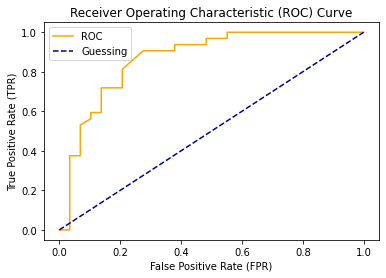

In [75]:
plot_roc_curve(fpr, tpr)

In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**3. Confusion Matrix**

A quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

Giving an idea of where the model is getting confused.

In [77]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [78]:
# show crosstab view
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


Number of True Positive: 26 (1, 1) (Actual, Predict)

Number of False Positive: 6 (0, 1)

Number of True Negative: 23 (0, 0)

Number of False Negative: 6 (1, 0)

In [79]:
import seaborn as sns

# create a function to plot confusion matrix
def plot_confusion_matrix(conf_mat):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False)

  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")

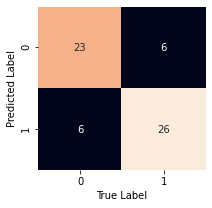

In [80]:
conf_mat = confusion_matrix(y_test, y_preds)

plot_confusion_matrix(conf_mat)

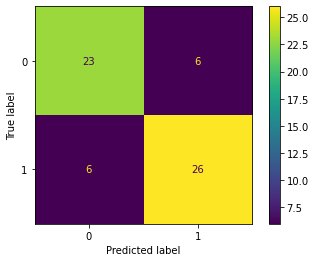

In [81]:
# plot confusion matrix using sklearn
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

**4. Classification Report**

- <ins>Precision:</ins> Proportion of positive identifications which were actually correct. If, a model produces no False Positive, the precision will be 1.0

- <ins>Recall:</ins> Proportion of actual positives which were classified. If a model produces no False Negative, the recall will be 1.0

- <ins>F1-Score:</ins> Combination of Precision and Recall. A perfect model achieves F1-Score 1.0

- <ins>Support:</ins> The number of samples each metric was calculated on.

- <ins>Macro Average:</ins> The average precision, recall and F1-score between classes. Doesn't class imbalance into effort. So, if there is class imbalance (difference between number of samples labeled with yes and number of samples labeled with no is extremely high), macro average should be considered really well.

  Here number of no is 29 and number of yes is 32, so it's not imbalanced.

- <ins>Weighted Average:</ins> The weighted average precision, recall and F1-score between classes. Weighted means each metric is calculated with respect to how many samples are there in each class.

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**Summarize Classification Report:**

- Accuracy is a good metric to start with if all classes are balanced

- Precision and recall are more important when classes are imbalanced

- If False Positive predictions are worse than False Negative, aim for a higher precision

- If False Negative predictions are worse than False Positive, aim for a higher recall

#### 4.2.2 Regression Model Evaluation Metrics

1. R^2 or coefficient of determination
2. Mean absolutre error
3. Mean squared error

**1. R^2 (R Squared) or Coefficient of Determination**

Compares your model's predictions to the mean of the targets.

Values can range from negative infinity to 1

If all your model does is predict the mean of the targets, the R^2 value will be 0

If your model **perfectly** predicts a range of numbers, the R^2 value will be 1

In [83]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.873969014117403

In [90]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [85]:
y_test.mean()

21.488235294117654

In [91]:
r2_score(y_test, y_test_mean) # all it does is predict the mean of the targets

2.220446049250313e-16

In [88]:
r2_score(y_test, y_test) # perfectly predicts

1.0

**2. Mean Absolute Error (MAE)**

Average of the absolute differences between actual values and predicted values. 

eg: (abs(AV1-PV1) + abs(AV2-PV2) + .... + abs(AVn-PVn)) / n

Gives an idea about how wrong your model's predictions are.

In [92]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)

mae

2.1226372549019623

In [97]:
# let's visualize what does the mae means

df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds, "differences": y_test - y_preds})

df.head()

,actual values,predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,-3.134
72,22.8,23.467,-0.667
452,16.1,16.853,-0.753


**3. Mean Squared Error (MSE)**

Average of the square of absolute differences between actual values and predicted values. 

eg: (abs(AV1-PV1)^2 + abs(AV2-PV2)^2 + .... + abs(AVn-PVn)^2) / n

In [98]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)

mse

9.242328990196082

**Summarize Regression Model Metrics**

- R^2 is similar to Accuracy in a sense that it gives a quick indication of how well your model might be doing (Generally the closer R^2 is to 1.0 the better). But doesn't really tell exactly how wrong your model is predicting.

- Mean Absolute Error gives a better indication of how far off each of your model's predictions are on an average

- Mean Squared Error amplifies larger differences.

Try to minimize MAE, MSE and try to maximize R^2.